In [ ]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.6 MB/s eta 0:00:00


In [ ]:
!pip install gensim

In [ ]:
!pip install scikit-learn gensim nltk

In [ ]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
pip install wordcloud matplotlib

#Cleaning

In [ ]:
import gensim
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr, spearmanr
import umap
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv("Hotel_Reviews.csv")
df.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,194.0,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin your holiday So we had to wait till 13 00 in order to check in my new room what a wonderful waist of my time The room 023 i got was just as i wanted to peaceful internal garden view big window We were tired from waiting the room so we placed our belongings and rushed to the city In the evening it turned out that there was a constant noise in the room i guess it was made by vibrating vent tubes or something it was constant and annoying as hell AND it did not stop even at 2 am making it hard to fall asleep for me and my wife I have an audio recording that i can not attach here but if you want i can send it via e mail The next day the technician came but was not able to determine the cause of the disturbing sound so i was offered to change the room once again the hotel was fully booked and they had only 1 room left the one that was smaller but seems newer,397.0,1403.0,Only the park outside of the hotel was beautiful,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']",0 days,52.360576,4.915968


In [ ]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [ ]:
df.isna().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  1
Review_Date                                   1
Average_Score                                 1
Hotel_Name                                    1
Reviewer_Nationality                          1
Negative_Review                               1
Review_Total_Negative_Word_Counts             1
Total_Number_of_Reviews                       1
Positive_Review                               1
Review_Total_Positive_Word_Counts             1
Total_Number_of_Reviews_Reviewer_Has_Given    1
Reviewer_Score                                1
Tags                                          1
days_since_review                             1
lat                                           1
lng                                           1
dtype: int64

In [ ]:
count_no_negative = (df['Negative_Review'] == 'No Negative').sum()
count_no_negative

18418

In [ ]:
count_no_positive = (df['Positive_Review'] == 'No Positive').sum()
count_no_positive

5762

In [ ]:
df = df.dropna()

In [ ]:
# Condition 1: Both Negative_Review and Positive_Review are 'No Negative' and 'No Positive' respectively
cond1 = (df['Negative_Review'] == 'No Negative') & (df['Positive_Review'] == 'No Positive')

# Condition 2: Negative_Review is 'No Negative' and Positive_Review is not 'No Positive'
cond2 = (df['Negative_Review'] == 'No Negative') & (df['Positive_Review'] != 'No Positive')

# Condition 3: Negative_Review is not 'No Negative' and Positive_Review is 'No Positive'
cond3 = (df['Negative_Review'] != 'No Negative') & (df['Positive_Review'] == 'No Positive')

# Condition 4: Both Negative_Review and Positive_Review are not 'No Negative' and 'No Positive' respectively
cond4 = (df['Negative_Review'] != 'No Negative') & (df['Positive_Review'] != 'No Positive')

# Apply conditions to create the merged column
df['Merged_Reviews'] = df['Negative_Review']
df.loc[cond2, 'Merged_Reviews'] = df['Positive_Review']
df.loc[cond3, 'Merged_Reviews'] = df['Negative_Review']
df.loc[cond4, 'Merged_Reviews'] = df['Negative_Review'] + ' ' + df['Positive_Review']
df.loc[cond1, 'Merged_Reviews'] = pd.NA


<ipython-input-13-3945bb662366>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Merged_Reviews'] = df['Negative_Review']


In [ ]:
df = df['Merged_Reviews']

In [ ]:
df.isna().sum()

17

In [ ]:
df = df.dropna()

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df

,Merged_Reviews
0,I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin your holiday So we had to wait till 13 00 in order to check in my new room what a wonderful waist of my time The room 023 i got was just as i wanted to peaceful internal garden view big window We were tired from waiting the room so we placed our belongings and rushed to the city In the evening it turned out that there was a constant noise in the room i guess it was made by vibrating vent tubes or something it was constant and annoying as hell AND it did not stop even at 2 am making it hard to fall asleep for me and my wife I have an audio recording that i can not attach here but if you want i can send it via e mail The next day the technician came but was not able to determine the cause of the disturbing sound so i was offered to change the room once again the hotel was fully booked and they had only 1 room left the one that was smaller but seems newer Only the park outside of the hotel was beautiful
1,No real complaints the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one Bit confusing Secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great Aside from those minor minor things fantastic spot and will be back when i return to Amsterdam
2,Rooms are nice but for elderly a bit difficult as most rooms are two story with narrow steps So ask for single level Inside the rooms are very very basic just tea coffee and boiler and no bar empty fridge Location was good and staff were ok It is cute hotel the breakfast range is nice Will go back
3,My room was dirty and I was afraid to walk barefoot on the floor which looked as if it was not cleaned in weeks White furniture which looked nice in pictures was dirty too and the door looked like it was attacked by an angry dog My shower drain was clogged and the staff did not respond to my request to clean it On a day with heavy rainfall a pretty common occurrence in Amsterdam the roof in my room was leaking luckily not on the bed you could also see signs of earlier water damage I also saw insects running on the floor Overall the second floor of the property looked dirty and badly kept On top of all of this a repairman who came to fix something in a room next door at midnight was very noisy as were many of the guests I understand the challenges of running a hotel in an old building but this negligence is inconsistent with prices demanded by the hotel On the last night after I complained about water damage the night shift manager offered to move me to a different room but that offer came pretty late around midnight when I was already in bed and ready to sleep Great location in nice surroundings the bar and restaurant are nice and have a 

In [ ]:
len(df)

76509


# Word2Vec

## Pre-processing

In [ ]:
review_text = df.Merged_Reviews.apply(gensim.utils.simple_preprocess)

## Model

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=5,
    workers=4,
)

## Vocabulary


In [ ]:
model.build_vocab(review_text, progress_per=1000)

## Train Word2Vec Model

In [ ]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(8370912, 12063560)

In [ ]:
model.wv.most_similar("clean")

[('spotless', 0.5965564846992493),
 ('stylish', 0.5325435400009155),
 ('roomy', 0.5106602311134338),
 ('immaculate', 0.5102203488349915),
 ('cozy', 0.47156572341918945),
 ('spacious', 0.46959128975868225),
 ('appointed', 0.4648991525173187),
 ('equipped', 0.45107704401016235),
 ('cosy', 0.4462321102619171),
 ('luxurious', 0.4424745738506317)]

In [ ]:
model.wv.similarity(w1="central", w2="tidy")

0.13862921

#Vectorize the text data

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train = df['Merged_Reviews'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
file = "DadosFinais2.xlsx"

In [ ]:
res = pd.read_excel(file, 'Reservas')
prop = pd.read_excel(file, 'Propriedades')
guests = pd.read_excel(file, 'Hóspedes')
data = pd.read_excel(file, 'Reviews - geral')
reviews2 = pd.read_excel(file, 'Reviews - detalhe')

In [ ]:
data

,ReservationId,RatingValue,Comments,Language,Translated,Polarity,NetPromoterScore,Aspects,Aspects_Polarity
0,1879140693,8,"Very nice place, it was spacious and good located! Communication between Feel Like Home and us was very good, they reply very fast! But, the only issue we had was that cockroaches and ants were everywhere (bedroom, kitchen, fridge, toilette, livingroom,...)",__label__en,nice place spacious welllocated communication feel like home u good replied fast issue cockroach ant everywhere bedroom kitchen fridge toilet living room,Positive,Good,place,positive
1,1879140693,8,"Very nice place, it was spacious and good located! Communication between Feel Like Home and us was very good, they reply very fast! But, the only issue we had was that cockroaches and ants were everywhere (bedroom, kitchen, fridge, toilette, livingroom,...)",__label__en,nice place spacious welllocated communication feel like home u good replied fast issue cockroach ant everywhere bedroom kitchen fridge toilet living room,Positive,Good,location,positive
2,1879140693,8,"Very nice place, it was spacious and good located! Communication between Feel Like Home and us was very good, they reply very fast! But, the only issue we had was that cockroaches and ants were everywhere (bedroom, kitchen, fridge, toilette, livingroom,...)",__label__en,nice place spacious welllocated communication feel like home u good replied fast issue cockroach ant everywhere bedroom kitchen fridge toilet living room,Positive,Good,communication,positive
3,1879140693,8,"Very nice place, it was spacious and good located! Communication between Feel Like Home and us was very good, they reply very fast! But, the only issue we had was that cockroaches and ants were everywhere (bedroom, kitchen, fridge, toilette, livingroom,...)",__label__en,nice place spacious welllocated communication feel like home u good replied fast issue cockroach ant everywhere bedroom kitchen fridge toilet living room,Positive,Good,home,positive
4,1879140693,8,"Very nice place, it was spacious and good located! Communication between Feel Like Home and us was very good, they reply very fast! But, the only issue we had was that cockroaches and ants were everywhere (bedroom, kitchen, fridge, toilette, livingroom,...)",__label__en,nice place spacious welllocated communication feel like home u good replied fast issue cockroach ant everywhere bedroom kitchen fridge toilet living room,Positive,Good,reply,positive
...,...,...,...,...,...,...,...,...,...
63742,1879180188,4,"pro: melhor localização no centro da cidade, o apartamento é limpo, recentemente restaurado (máximo de 5 anos) e bem equipado com aparelhos úteis: não tão barato, o apartamento deve ser administrado por uma empresa chamada feel likehome e o check in e check out deve ser feito em um local que fica a 15 minutos a pé. se você tem filhos e bagagem, é muito desconfortável. também, o check in é às 15h e você não pode obter nenhuma antecipação.",__label__pt,pro best location city center apartment clean recently renovated max year old wellequipped useful appliance however cheap apartment managed company called feel like home checkin checkout must done location minute walk away kid luggage uncomfortable also checkin pm get earlier,Positive,Good,company,negative
63743,1879180188,4,"pro: melhor localização no centro da cidade, o apartamento é limpo, recentemente restaurado (máximo de 5 anos) e bem equipado com aparelhos úteis: não tão barato, o apartamento deve ser administrado por uma empresa chamada feel likehome e o check in e check out deve ser feito em um local que fica a 15 minutos a pé. se você tem filhos e bagagem, é muito desconfortável. também, o check in é às 15h e você não pode obter nenhuma antecipação.",__label__pt,pro best location city center apartment clean recently renovated max year old wellequipped useful appliance however cheap apartment managed company called feel like home checkin checkout must done location minute walk away kid luggage 

In [ ]:
def vectorize(sentence, embedding_size=100):
    if isinstance(sentence, float):
        return np.zeros(embedding_size)  # Return zero vector for float values
    words = sentence.split()
    words_vecs = [model.wv[word] for word in words if word in model.wv]
    if len(words_vecs) == 0:
        return np.zeros(embedding_size)  # Return zero vector if no words are found in the model
    return np.mean(words_vecs, axis=0)

# Assuming 'data' is your DataFrame and 'Aspect' is the column containing sentences
data['Aspect_vectors'] = data['Aspects'].apply(vectorize)


# Dimensionality Reduction- UMAP -> Clustering

# FR ES

In [ ]:
res = pd.read_excel(file, 'Reservas')
prop = pd.read_excel(file, 'Propriedades')
guests = pd.read_excel(file, 'Hóspedes')
data = pd.read_excel(file, 'Reviews - geral')
reviews2 = pd.read_excel(file, 'Reviews - detalhe')

In [ ]:
countries = ['FR', 'ES']
data = data[data['ReservationId'].isin(guests[guests['GuestCountry'].isin(countries)]['ReservationId'])]

In [ ]:
len(data['Aspects'].unique())

2038

In [ ]:
data['Aspect_vectors'] = data['Aspects'].apply(vectorize)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 and n_dim = 5, the average silhouette_score is: 0.3562


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 and n_dim = 10, the average silhouette_score is: 0.3582


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 and n_dim = 15, the average silhouette_score is: 0.3581


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 and n_dim = 20, the average silhouette_score is: 0.3565


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 and n_dim = 25, the average silhouette_score is: 0.3537


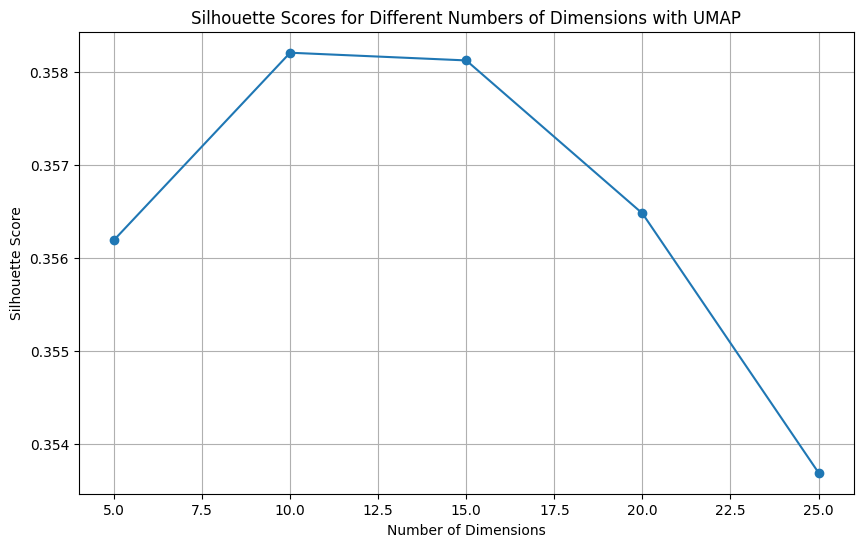

In [ ]:

dimensions = [5, 10, 15, 20, 25]

# Store silhouette scores
silhouette_scores = []

for n_dim in dimensions:
    # Reduce dimensions with UMAP
    umap_model = umap.UMAP(n_components=n_dim, random_state=42)
    umap_result = umap_model.fit_transform(word_embeddings)

    # Perform KMeans clustering
    clusterer = KMeans(n_clusters=6, random_state=10)
    cluster_labels = clusterer.fit_predict(umap_result)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(umap_result, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = 6 and n_dim = {n_dim}, the average silhouette_score is: {silhouette_avg:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(dimensions, silhouette_scores, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Dimensions with UMAP')
plt.grid(True)
plt.show()


In [ ]:
word_embeddings = np.array(data['Aspect_vectors'].tolist())

# List of dimensions to iterate over
dimensions = [5, 10, 15, 20, 25]

# Initialize results storage
results = []

for dim in dimensions:
    # Initialize UMAP model
    umap_model = umap.UMAP(n_components=dim)

    # Fit and transform the word embeddings
    umap_result = umap_model.fit_transform(word_embeddings)

    # Compute pairwise distances
    original_distances = pdist(word_embeddings)
    reduced_distances = pdist(umap_result)

    # Compute correlations
    pearson_corr, _ = pearsonr(original_distances, reduced_distances)
    spearman_corr, _ = spearmanr(original_distances, reduced_distances)

    # Store results
    results.append({
        'dimension': dim,
        'pearson_corr': pearson_corr,
        'spearman_corr': spearman_corr
    })

    print(f"Dimension: {dim}")
    print(f"Pearson correlation of pairwise distances: {pearson_corr:.4f}")
    print(f"Spearman correlation of pairwise distances: {spearman_corr:.4f}")

# Optionally, convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

Dimension: 5
Pearson correlation of pairwise distances: 0.3447
Spearman correlation of pairwise distances: 0.2681
Dimension: 10
Pearson correlation of pairwise distances: 0.4024
Spearman correlation of pairwise distances: 0.3027
Dimension: 15
Pearson correlation of pairwise distances: 0.3913
Spearman correlation of pairwise distances: 0.2885
Dimension: 20
Pearson correlation of pairwise distances: 0.4521
Spearman correlation of pairwise distances: 0.3522
Dimension: 25
Pearson correlation of pairwise distances: 0.4162
Spearman correlation of pairwise distances: 0.3091
   dimension  pearson_corr  spearman_corr
0          5      0.344739       0.268082
1         10      0.402408       0.302653
2         15      0.391292       0.288485
3         20      0.452125       0.352172
4         25      0.416205       0.309073


In [ ]:
## Escolheu-se então 20 dimensões

In [ ]:
umap_model = umap.UMAP(n_components=20)  # Specify 3 components for 3D visualization

# Fit and transform the word embeddings
umap_result = umap_model.fit_transform(word_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

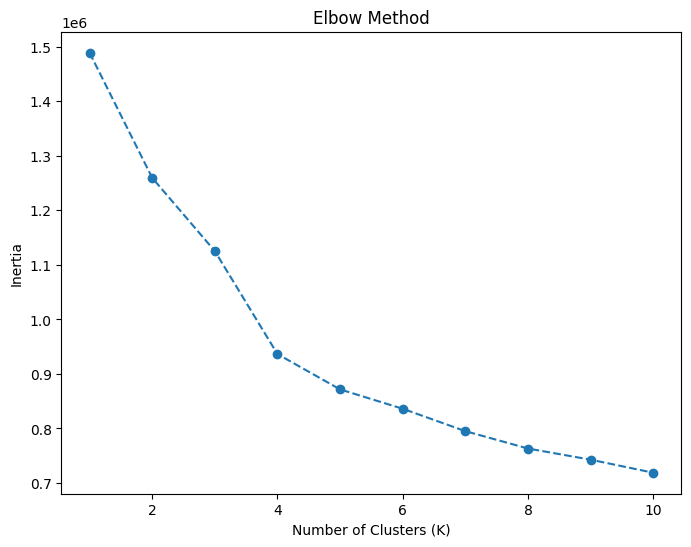

In [ ]:
inertia = []
for k in range(1, 11):  # Try different values of K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(umap_result)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.34019682


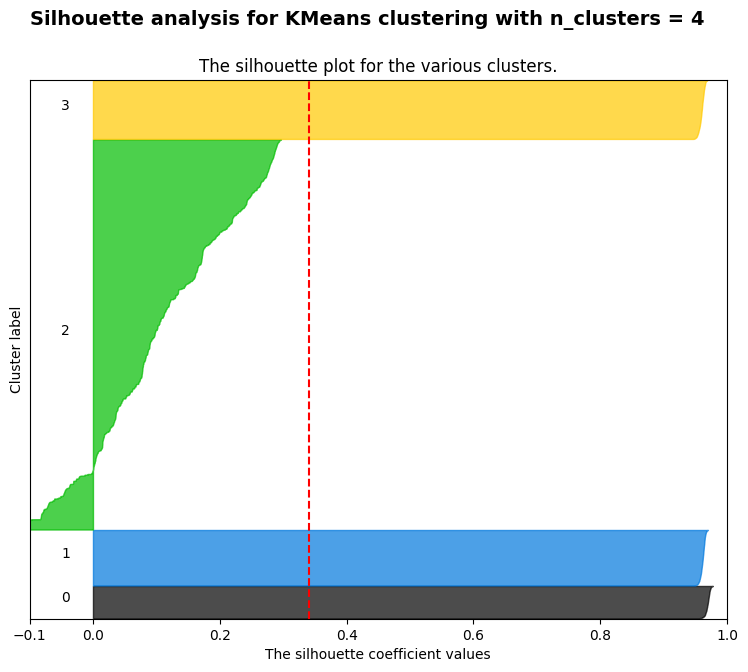

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.34628814


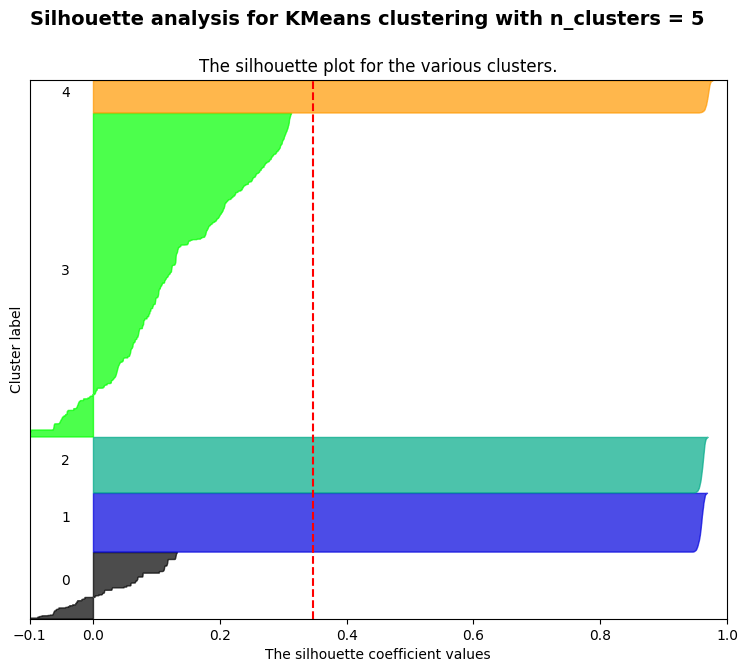

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.38002416


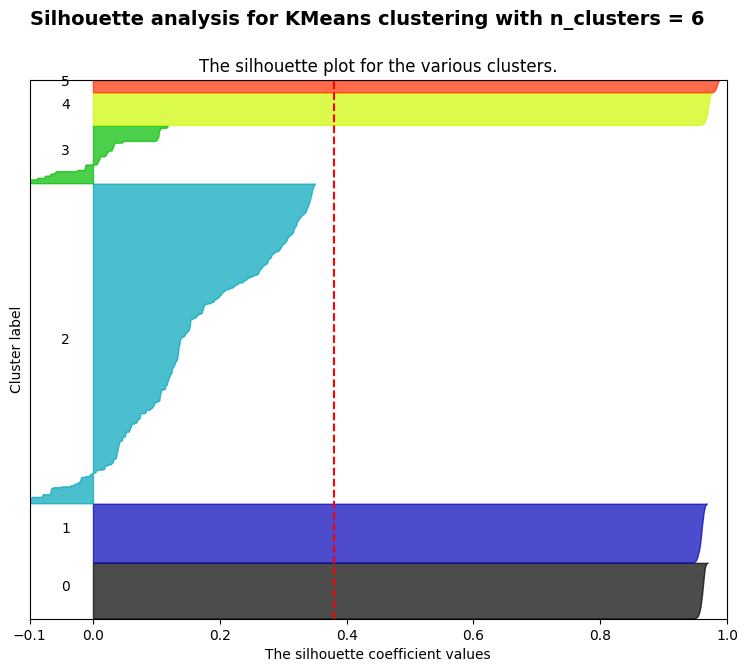

In [ ]:
range_n_clusters = [4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the KMeans clusterer with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(umap_result)

    # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(umap_result, cluster_labels)
    print(
        "For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(umap_result, cluster_labels)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # Silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(umap_result) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Vertical line for average silhouette score
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters,
        fontsize=14, fontweight='bold'
    )

    plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)

# Fit the KMeans model to the UMAP-transformed data
kmeans.fit(umap_result)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_
data['Cluster_Labels'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data['Cluster_Labels'].value_counts()

Cluster_Labels
4    5957
1    2990
3    1348
2    1274
0     742
Name: count, dtype: int64

In [ ]:
top_aspect_values = {}

# Iterate over each cluster label
for cluster_label in data['Cluster_Labels'].unique():
    # Filter data for the current cluster label
    cluster_data = data[data['Cluster_Labels'] == cluster_label]
    # Count the occurrences of each 'Aspect' value and sort them in descending order
    aspect_counts = cluster_data['Aspects'].value_counts().head(15)
    # Store the top 15 most common 'Aspect' values for the current cluster label
    top_aspect_values[cluster_label] = aspect_counts

# Display the results
for cluster_label, aspect_counts in top_aspect_values.items():
    print(f"Cluster {cluster_label}:")
    print(aspect_counts)
    print()

Cluster 4:
Aspects
accommodation    272
kitchen          153
neighborhood     146
cleanliness      141
place            126
house            113
equipment         95
photo             92
communication     81
terrace           79
shower            74
room              68
noise             64
decoration        63
host              62
Name: count, dtype: int64

Cluster 1:
Aspects
bathroom      184
stay          160
view          145
bed           101
clean          92
area           86
restaurant     75
service        72
parking        65
key            64
street         63
bedding        56
space          55
elevator       54
towel          52
Name: count, dtype: int64

Cluster 2:
Aspects
location                 1273
geographical location       1
Name: count, dtype: int64

Cluster 0:
Aspects
agency          98
lisbon          46
Lisbon          35
beach           28
porto           27
utensil         26
sponge          23
bairro alto     12
appliance       12
alfama          12
well-loc

In [ ]:
data['Cluster_Labels'] = data['Cluster_Labels'].map({
    3: 'Apartments',
    1: 'Stay Experience',
    0: 'Geographical Locations and Agencies',
    2: 'Location',
    4: 'Accommodation Features'
})

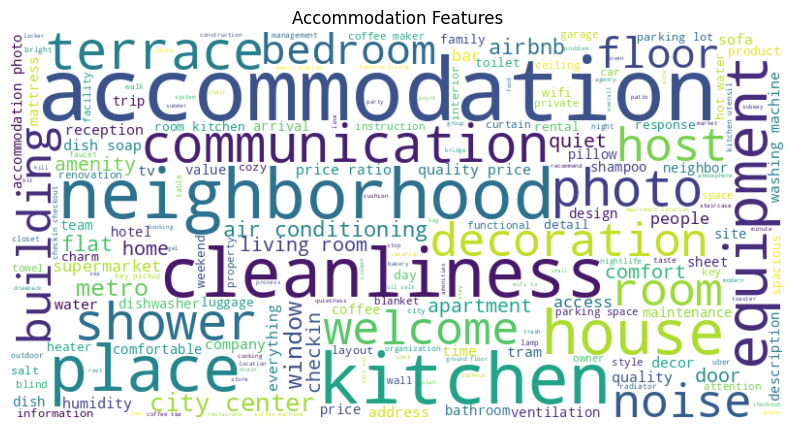

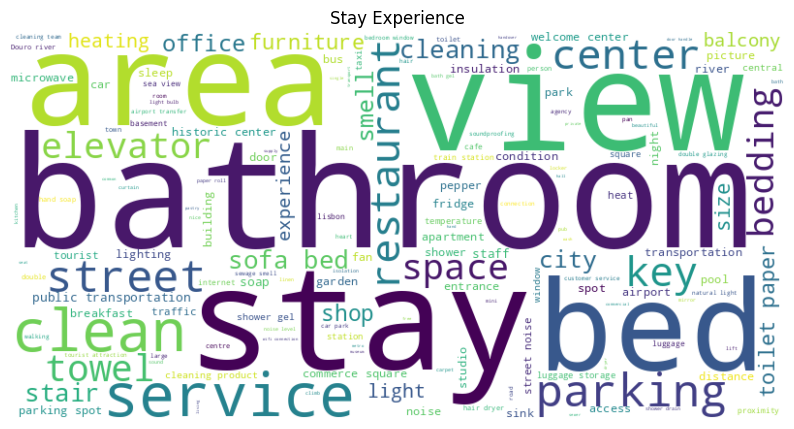

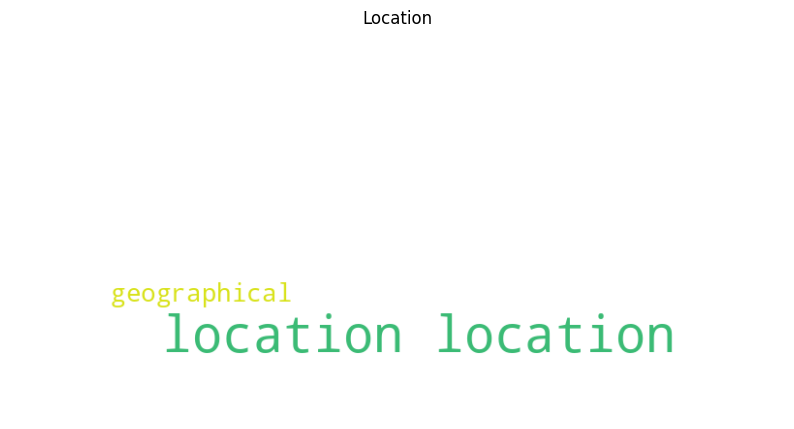

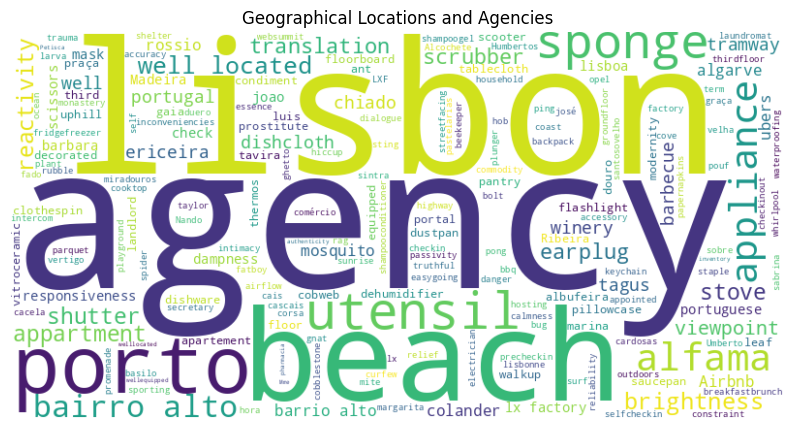

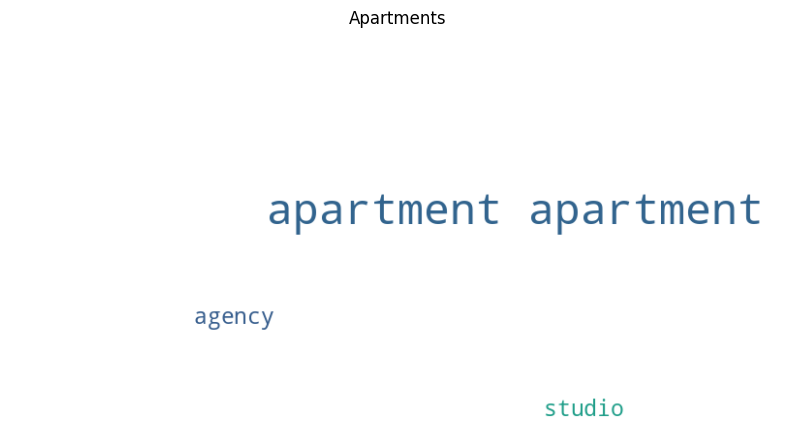

In [ ]:
clusters = data['Cluster_Labels'].unique()

for cluster in clusters:
    # Aggregate terms for the current cluster
    terms = data[data['Cluster_Labels'] == cluster]['Aspects']

    # Combine terms into a single string
    text = ' '.join(terms)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(cluster)
    plt.axis('off')
    plt.show()

In [ ]:
data.to_excel('clusterFRESPT.xlsx',index=False)